In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import refspec
from pathlib import Path
import gc
import random

In [2]:
# Generate x% unique random numbers within a range, inserts random 'glitches'
# Plots & compares all power spectra produced to original power spectrum
# All you need to do is put the file name of your data into file
# Make sure your data file is in the directory you're currently in

file = 'adc_waveform_wPF.bin'
path = os.path.abspath(file)
print(path)
filename=path
data_raw=np.fromfile(filename,dtype=np.int16)

/home/juvi/notebooks/spectrometer/adc_waveform_wPF.bin


In [4]:
# Set to 3 hit lengths by default, represented by g
# Set to 4 percentages of number of data points changed to 0 by default, represented by fraction
# If changing percent values, make sure to change "if f ==" to desired percent values that match in glitch_len_max

fraction = [0.01,0.1,0.2,0.3]
glitch_len_max = [1,10,100]

for g in range(3):
    print ("Doing length:" ,glitch_len_max[g])
    for f in fraction:
        print ("Doing fraction:",f)
        data = np.copy(data_raw)
        for ndx_s in np.random.randint(0,len(data),int(len(data)*f/(glitch_len_max[g]/2))):
            ndx_e = ndx_s + np.random.randint(0,glitch_len_max[g]+1)
            data[ndx_s:ndx_e]=0
        if f == 0.01:
            percent = float((data==0).sum()/len(data))
            if g == 0:
                open('0.01_hl1_{}'.format(file),'wb').write(data.tobytes())
                print("saving '0.01_hl1_{}'".format(file))
                file1 = '0.01_hl1_{}'.format(file)
            if g == 1:
                open('0.01_hl10_{}'.format(file),'wb').write(data.tobytes())
                print("saving '0.01_hl10_{}'".format(file))
                file5 = '0.01_hl10_{}'.format(file)
            if g == 2:
                open('0.01_hl100_{}'.format(file),'wb').write(data.tobytes())
                print("saving '0.01_hl100_{}'".format(file))
                file9 = '0.01_hl100_{}'.format(file)
        if f == 0.1:
            percent2 = float((data==0).sum()/len(data))
            if g == 0:
                open('0.1_hl1_{}'.format(file),'wb').write(data.tobytes())
                print("saving '0.1_hl1_{}'".format(file))
                file2 = '0.1_hl1_{}'.format(file)
            if g == 1:
                open('0.1_hl10_{}'.format(file),'wb').write(data.tobytes())
                print("saving '0.1_hl10_{}'".format(file))
                file6 = '0.1_hl10_{}'.format(file)
            if g == 2:
                open('0.1_hl100_{}'.format(file),'wb').write(data.tobytes())
                print("saving '0.1_hl100_{}'".format(file))
                file10 = '0.1_hl100_{}'.format(file)
        if f == 0.2:
            percent3 = float((data==0).sum()/len(data))
            if g == 0:
                open('0.2_hl1_{}'.format(file),'wb').write(data.tobytes())
                print("saving '0.2_hl1_{}'".format(file))
                file3 = '0.2_hl1_{}'.format(file)
            if g == 1:
                open('0.2_hl10_{}'.format(file),'wb').write(data.tobytes())
                print("saving '0.2_hl10_{}'".format(file))
                file7 = '0.2_hl10_{}'.format(file)
            if g == 2:
                open('0.2_hl100_{}'.format(file),'wb').write(data.tobytes())
                print("saving '0.2_hl100_{}'".format(file))
                file11 = '0.2_hl100_{}'.format(file)
        if f == 0.3:
            percent4 = float((data==0).sum()/len(data))
            if g == 0:
                open('0.3_hl1_{}'.format(file),'wb').write(data.tobytes())
                print("saving '0.3_hl1_{}'".format(file))
                file4 = '0.3_hl1_{}'.format(file)
            if g == 1:
                open('0.3_hl10_{}'.format(file),'wb').write(data.tobytes())
                print("saving '0.3_hl10_{}'".format(file))
                file8 = '0.3_hl10_{}'.format(file)
            if g == 2:
                open('0.3_hl100_{}'.format(file),'wb').write(data.tobytes())
                print("saving '0.3_hl100_{}'".format(file))
                file12 = '0.3_hl100_{}'.format(file)

Doing length: 1
Doing fraction: 0.01
saving '0.01_hl1_adc_waveform_wPF.bin'
Doing fraction: 0.1
saving '0.1_hl1_adc_waveform_wPF.bin'
Doing fraction: 0.2
saving '0.2_hl1_adc_waveform_wPF.bin'
Doing fraction: 0.3
saving '0.3_hl1_adc_waveform_wPF.bin'
Doing length: 10
Doing fraction: 0.01
saving '0.01_hl10_adc_waveform_wPF.bin'
Doing fraction: 0.1
saving '0.1_hl10_adc_waveform_wPF.bin'
Doing fraction: 0.2
saving '0.2_hl10_adc_waveform_wPF.bin'
Doing fraction: 0.3
saving '0.3_hl10_adc_waveform_wPF.bin'
Doing length: 100
Doing fraction: 0.01
saving '0.01_hl100_adc_waveform_wPF.bin'
Doing fraction: 0.1
saving '0.1_hl100_adc_waveform_wPF.bin'
Doing fraction: 0.2
saving '0.2_hl100_adc_waveform_wPF.bin'
Doing fraction: 0.3
saving '0.3_hl100_adc_waveform_wPF.bin'


In [7]:
#notch is turned off by default in refspec, uncomment the cfg.notch line to turn notch on

f = []
pk = []
for x in range(13):
    files = [file, file1, file2, file3, file4, file5, file6, file7, file8, file9, file10, file11, file12]
    path = os.path.abspath(files[x])
    print(path)
    filename = path
    cfg = refspec.SpecConfig()
    cfg.Ntaps           = 8
    cfg.Nchannels       = 1
    cfg.Average1Size    = 64
    cfg.Average2Size    = 700
    #cfg.notch = True 
    fundamental         = cfg.fundamental_frequency()
    blocks              = cfg.AverageSize()+2*cfg.Ntaps
    signal = refspec.FileStreamSource(cfg.Nfft,cfg.Nchannels,filename)
    output = refspec.SpecOutput(cfg)
    spectrometer = refspec.RefSpectrometer(signal, cfg)
    spectrometer.run(output)
    f.append(fundamental*np.arange(cfg.Nbins())/1e6)
    pk.append(np.array([output.get_avg_pspec(0, i) for i in range(0, cfg.Nbins())]))

/home/juvi/notebooks/spectrometer/adc_waveform_wPF.bin
Read 204800000 records from /home/juvi/notebooks/spectrometer/adc_waveform_wPF.bin
/home/juvi/notebooks/spectrometer/0.01_hl1_adc_waveform_wPF.bin
Read 204800000 records from /home/juvi/notebooks/spectrometer/0.01_hl1_adc_waveform_wPF.bin
/home/juvi/notebooks/spectrometer/0.1_hl1_adc_waveform_wPF.bin
Read 204800000 records from /home/juvi/notebooks/spectrometer/0.1_hl1_adc_waveform_wPF.bin
/home/juvi/notebooks/spectrometer/0.2_hl1_adc_waveform_wPF.bin
Read 204800000 records from /home/juvi/notebooks/spectrometer/0.2_hl1_adc_waveform_wPF.bin
/home/juvi/notebooks/spectrometer/0.3_hl1_adc_waveform_wPF.bin
Read 204800000 records from /home/juvi/notebooks/spectrometer/0.3_hl1_adc_waveform_wPF.bin
/home/juvi/notebooks/spectrometer/0.01_hl10_adc_waveform_wPF.bin
Read 204800000 records from /home/juvi/notebooks/spectrometer/0.01_hl10_adc_waveform_wPF.bin
/home/juvi/notebooks/spectrometer/0.1_hl10_adc_waveform_wPF.bin
Read 204800000 records

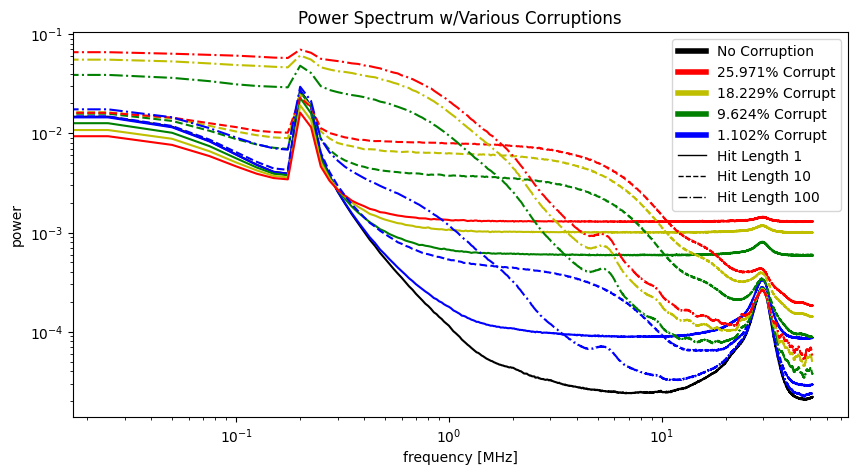

In [9]:
# indexes: 0 = Original Waveform, 1-4 = hl1, 5-8 = hl10, 9-12 = hl100

from matplotlib.lines import Line2D
true = percent*100
true2 = percent2*100
true3 = percent3*100
true4 = percent4*100
plt.figure(figsize=(10,5))
plt.plot(f[0], pk[0], 'k', linestyle = "-")
j = 1
plt.plot(f[j],pk[j], 'b', linestyle = "-")
plt.plot(f[j+1],pk[j+1], 'g', linestyle = "-")
plt.plot(f[j+2],pk[j+2], 'y', linestyle = "-")
plt.plot(f[j+3],pk[j+3], 'r', linestyle = "-")
j = 5
plt.plot(f[j],pk[j], 'b', linestyle = "--")
plt.plot(f[j+1],pk[j+1], 'g', linestyle = "--")
plt.plot(f[j+2],pk[j+2], 'y', linestyle = "--")
plt.plot(f[j+3],pk[j+3], 'r', linestyle = "--")
j = 9
plt.plot(f[j],pk[j], 'b', linestyle = "-.")
plt.plot(f[j+1],pk[j+1], 'g', linestyle = "-.")
plt.plot(f[j+2],pk[j+2], 'y', linestyle = "-.")
plt.plot(f[j+3],pk[j+3], 'r', linestyle = "-.")
plt.xlabel('frequency [MHz]')
plt.title('Power Spectrum w/Various Corruptions')
plt.ylabel('power')
plt.loglog()
legend_elements = [Line2D([0], [0], color='k', lw=4, label='No Corruption'),
                   Line2D([0], [0], color='r', lw=4, label='{:.3f}% Corrupt'.format(true4)),
                   Line2D([0], [0], color='y', lw=4, label='{:.3f}% Corrupt'.format(true3)),
                   Line2D([0], [0], color='g', lw=4, label='{:.3f}% Corrupt'.format(true2)),
                   Line2D([0], [0], color='b', lw=4, label='{:.3f}% Corrupt'.format(true)),
                   Line2D([0], [0], color='k', linestyle = "-", lw=1, label='Hit Length 1'),
                   Line2D([0], [0], color='k', linestyle = "--", lw=1, label='Hit Length 10'),
                   Line2D([0], [0], color='k', linestyle = "-.", lw=1, label='Hit Length 100')]
plt.legend(handles=legend_elements)
#plt.savefig('sine_spectrum_comparison.png')
plt.show()